### Creating directories: train, validation and test

To train our model we will use the `train` directory. The model will be evaluated with the data inside de `validation` directory and finally, it will be tested thanks to the testing data inside the `test` directory. These three directories will be created along this notebook. Inside each directory, folders for each particle will be included together with another directory with the noise data.

In [16]:
import os, shutil
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path to the directory where the cropped images are located
original_dataset_dir = '/gpfs/projects/damic/cropped_images/'

In [3]:
# path to the directory where the training, validation and test directories will be stored
base_dir = '/gpfs/projects/damic/'

# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [4]:
# Directory with our training electron energy images
train_e_dir = os.path.join(train_dir, 'electrons')
os.mkdir(train_e_dir)

# Directory with our training noise images
train_noise_dir = os.path.join(train_dir, 'noise')
os.mkdir(train_noise_dir)

In [5]:
# Directory with our validation electron energy images
validation_e_dir = os.path.join(validation_dir, 'electrons')
os.mkdir(validation_e_dir)

# Directory with our validation noise images
validation_noise_dir = os.path.join(validation_dir, 'noise')
os.mkdir(validation_noise_dir)

In [6]:
# Directory with our test electron energy images
test_e_dir = os.path.join(test_dir, 'electrons')
os.mkdir(test_e_dir)

# Directory with our test noise images
test_noise_dir = os.path.join(test_dir, 'noise')
os.mkdir(test_noise_dir)

Now we copy the electron images to the differente directories: in total we have 2628
* The first 1300 will go to train
* The next 700 to validation
* And the last 628 to test

In [7]:
electrons_noise = glob.glob1(original_dataset_dir,"*11.npz")

for index, file in enumerate(electrons_noise):  
    if index <= 1299:
        
        energy = np.load(os.path.join(original_dataset_dir, electrons_noise[index]))['energy']
        noise = np.load(os.path.join(original_dataset_dir, electrons_noise[index]))['noise']
        
        np.savez(os.path.join(train_e_dir, file), energy=energy)
        np.savez(os.path.join(train_noise_dir, file), noise=noise)
        
        if index == 1299:
            print("training directory complete")
    
    elif index <= 1999:
        
        energy = np.load(os.path.join(original_dataset_dir, electrons_noise[index]))['energy']
        noise = np.load(os.path.join(original_dataset_dir, electrons_noise[index]))['noise']
        
        np.savez(os.path.join(validation_e_dir, file), energy=energy)
        np.savez(os.path.join(validation_noise_dir, file), noise=noise)
        
        if index == 1999:
            print("validation directory complete")
        
    else:
        
        energy = np.load(os.path.join(original_dataset_dir, electrons_noise[index]))['energy']
        noise = np.load(os.path.join(original_dataset_dir, electrons_noise[index]))['noise']
        
        np.savez(os.path.join(test_e_dir, file), energy=energy)
        np.savez(os.path.join(test_noise_dir, file), noise=noise)
        
        if index == (len(electrons_noise)-1):
            print("test directory complete")

training directory complete
validation directory complete
test directory complete


Now, we shall check the number of files inside each directory:

In [11]:
electrons_train = len(os.listdir(train_e_dir))
noise_train = len(os.listdir(train_noise_dir))
print(electrons_train, "number of files in train_e_dir and", noise_train, "number of files in train_noise_dir")

electrons_v = len(os.listdir(validation_e_dir))
noise_v = len(os.listdir(validation_noise_dir))
print(electrons_v, "number of files in validation_e_dir and", noise_v, "number of files in validation_noise_dir")

electrons_test = len(os.listdir(test_e_dir))
noise_test = len(os.listdir(test_noise_dir))
print(electrons_test, "number of files in test_e_dir and", noise_test, "number of files in test_noise_dir")

1300 number of files in train_e_dir and 1300 number of files in train_noise_dir
700 number of files in validation_e_dir and 700 number of files in validation_noise_dir
628 number of files in test_e_dir and 628 number of files in test_noise_dir


Finally, we check if we have the energy and the noise correctly:

Text(0.5, 1.0, 'Electron energy from the training directory')

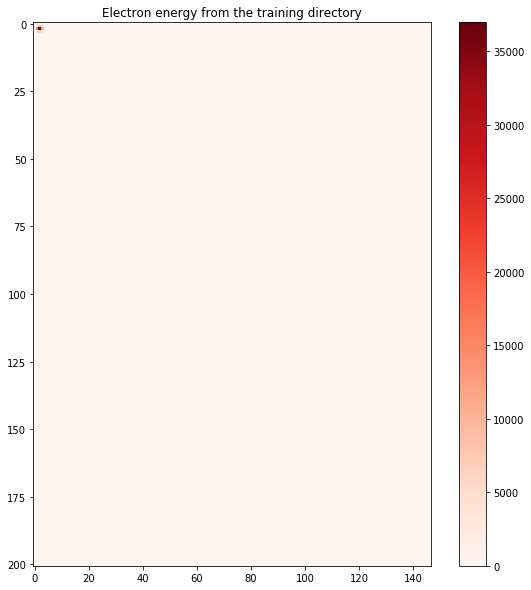

In [26]:
e_train = os.listdir(train_e_dir)

e = np.load(os.path.join(train_e_dir, e_train[0]))['energy']

plt.figure(figsize=(10,10))
plt.imshow(e, cmap='Reds')
plt.colorbar()
plt.title("Electron energy from the training directory")

Text(0.5, 1.0, 'Noise from trainig directory')

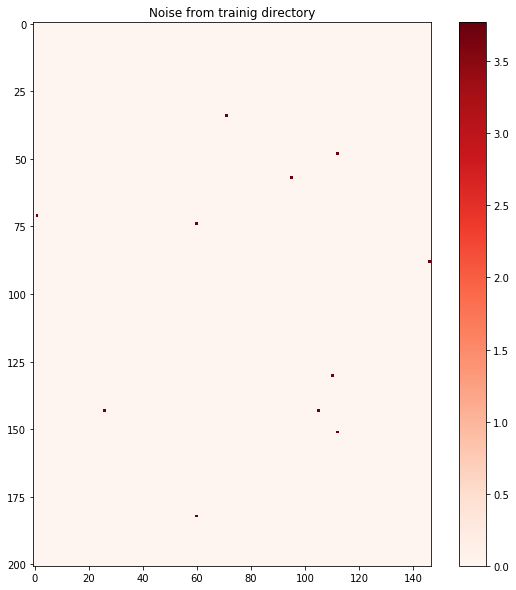

In [27]:
n_train = os.listdir(train_noise_dir)

n = np.load(os.path.join(train_noise_dir, n_train[0]))['noise']

plt.figure(figsize=(10,10))
plt.imshow(n, cmap='Reds')
plt.colorbar()
plt.title("Noise from trainig directory")